# Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [3]:
data = pd.read_csv("Datasets/dermatology_database_1.csv")
data = data.replace('?', np.nan)
data = data.dropna()

In [ ]:
# data.corr()['class'].sort_values(ascending=True)

Explained variance ratio: [0.27359219 0.16169949]


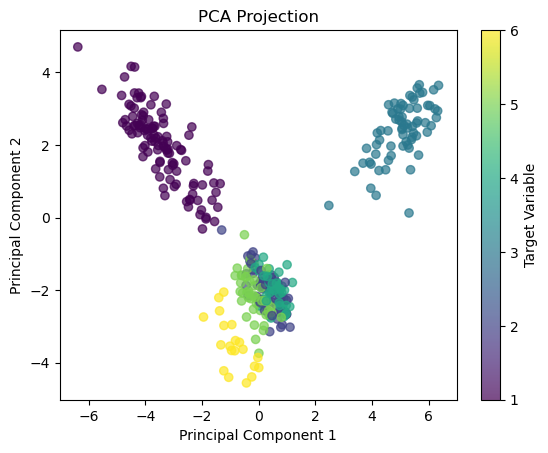

In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values  # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7 (Optional): Visualize the results
import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar(label="Target Variable")
plt.show()

Explained variance ratio: [0.27359219 0.16169949]


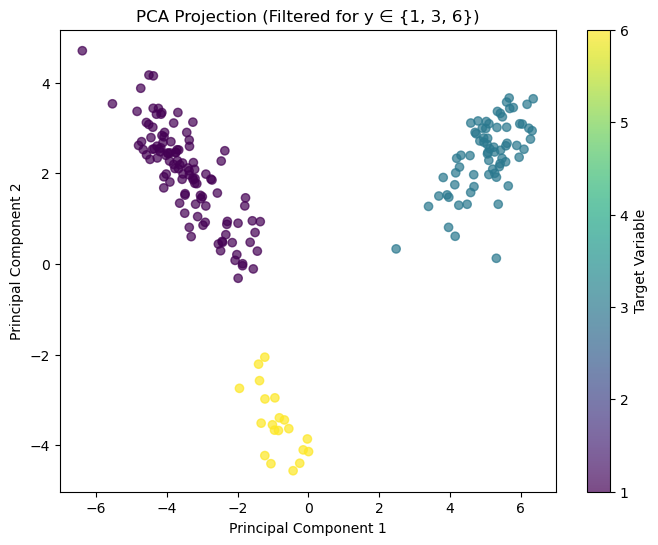

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume df is already defined
df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values   # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7: Filter data where target variable y is in [1, 3, 6]
df_filtered = df_pca[df_pca['Target'].isin([1, 3, 6])]

# Step 8: Visualize the filtered results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_filtered['PC1'], df_filtered['PC2'], 
                      c=df_filtered['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Filtered for y ∈ {1, 3, 6})')

# Add color bar legend
cbar = plt.colorbar(scatter)
cbar.set_label("Target Variable")

plt.show()

In [ ]:
df_filtered.head()

,PC1,PC2,Target
1,-3.204633,1.886023,1
2,5.207653,2.092146,3
3,-4.449690,2.788044,1
4,4.737936,2.872119,3
7,4.911495,2.997151,3


In [ ]:
import numpy as np


mapping = {1: 0, 3: 1, 6: 2}
y_transformed = np.vectorize(mapping.get)(y)

print(y_transformed)  # Output: [0 1 2]

[0 1 0 1 1 0 0 1 0 1 2 1 0 2 1 0 0 1 0 0 1 2 1 1 0 0 0 1 2 0 0 1 0 0 2 1 0
 1 0 0 0 1 0 0 1 0 2 0 0 0 1 0 0 1 1 1 1 0 2 0 0 2 1 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 1 1 1 2 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 2 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 2 2 2 2 2 0 0 0 0 0 0 0 1 1 0]


In [86]:
y = df_filtered[['Target']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((161, 3), (20, 3), (21, 3), (161, 1), (20, 1), (21, 1))

In [87]:
mapping = {1: 0, 3: 1, 6: 2}
y_transformed = np.vectorize(mapping.get)(y_train)

In [88]:
def one_hot_encoding(y, c):
    matrix = np.zeros((len(y), c))
    index = np.arange(len(y))
    matrix[index, y] = 1
    return matrix

y_one_hot = one_hot_encoding(y_transformed, 3)  
print(y_one_hot)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1.

In [89]:
X = df_filtered[['PC1', 'PC2']].values
X = np.c_[np.ones(X.shape[0]), X] # Add bias term
c = 3  
W = np.random.randn(3, c)
X.shape, W.shape, y_one_hot.shape


((202, 3), (3, 3), (161, 3))

In [90]:
def calculate_z(X_train, W):
    # X=(m, n) ; W=(n, c)  
    z = np.dot(X_train, W) # z = (m, c)
    return z

z = calculate_z(X_train, W)
z.shape


(161, 3)

In [91]:
np.sum(np.exp(z), axis = 1, keepdims=True).shape

(161, 1)

In [92]:
def calculate_softmax(z):
    y_hat = np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    return y_hat

y_hat = calculate_softmax(z)
y_hat.shape

(161, 3)

In [93]:
def calculate_loss_function(y_one_hot, y_hat):
    loss = -np.sum(y_one_hot * np.log(y_hat)) / y_one_hot.shape[0]
    return loss 

loss = calculate_loss_function(y_one_hot, y_hat)
loss

8.456222205839929

In [94]:
def calculate_gradient(y_one_hot, y_hat, X_train):
    m = X.shape[0]
    grad = np.dot(X_train.T, (y_hat - y_one_hot)) / m
    return grad

grad = calculate_gradient(y_one_hot, y_hat, X_train)
grad.shape

(3, 3)

In [95]:
def update_weights(W, grad, lr):
    W = W - lr * grad
    return W

W = update_weights(W, grad, 0.01)
W.shape

(3, 3)

In [96]:
np.argmax([[0.3, 0.5, 0.2],[0.8, 0.1, 0.1]], axis=1)

array([1, 0])

In [97]:
X_train.shape, y_train.shape    

((161, 3), (161, 1))

In [104]:
mapping = {1: 0, 3: 1, 6: 2}
np.vectorize(mapping.get)(y_val), y_val 

(array([[1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [2],
        [1],
        [0],
        [2],
        [0]]),
 array([[3],
        [1],
        [1],
        [3],
        [1],
        [1],
        [1],
        [3],
        [1],
        [3],
        [3],
        [1],
        [1],
        [1],
        [1],
        [6],
        [3],
        [1],
        [6],
        [1]]))

Epoch 1/300, loss: 17.1898592215977, f1: 0.3333333333333333, accuracy: 0.1
Best f1: 0.3333333333333333
Epoch 2/300, loss: 15.267611549030224, f1: 0.3333333333333333, accuracy: 0.1
Epoch 3/300, loss: 14.398413117541349, f1: 0.2222222222222222, accuracy: 0.05
Epoch 4/300, loss: 13.920339889096212, f1: 0.3434343434343434, accuracy: 0.25
Best f1: 0.3434343434343434
Epoch 5/300, loss: 13.536802429356431, f1: 0.41818181818181815, accuracy: 0.35
Best f1: 0.41818181818181815
Epoch 6/300, loss: 13.178226721413507, f1: 0.2183574879227053, accuracy: 0.35
Epoch 7/300, loss: 12.841068943403627, f1: 0.2183574879227053, accuracy: 0.35
Epoch 8/300, loss: 12.530202251839018, f1: 0.2183574879227053, accuracy: 0.35
Epoch 9/300, loss: 12.247102849942422, f1: 0.2183574879227053, accuracy: 0.35
Epoch 10/300, loss: 11.990160754899645, f1: 0.2371615312791783, accuracy: 0.35
Epoch 11/300, loss: 11.756580357816826, f1: 0.2371615312791783, accuracy: 0.35
Epoch 12/300, loss: 11.543645937630934, f1: 0.277777777777

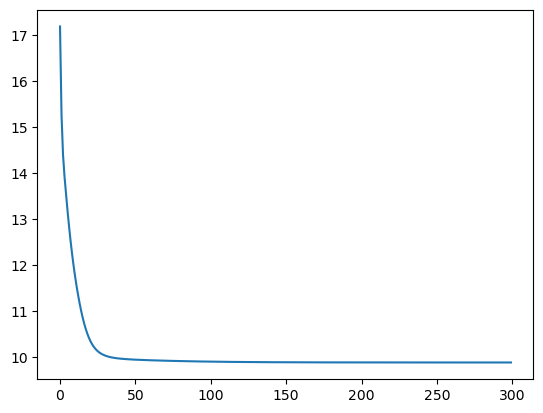

In [113]:
epochs = 300
lr = 0.1
batch_size = 10
def train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size):
    lossess = []
    best_f1 = 0
    best_w = W
    mapping = {1: 0, 3: 1, 6: 2}
    y_val = np.vectorize(mapping.get)(y_val)
    for epoch in range(epochs):
        for i in range(0, len(y_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            z = calculate_z(X_batch, W)
            y_hat = calculate_softmax(z)
            loss = calculate_loss_function(y_batch, y_hat)
            grad = calculate_gradient(y_batch, y_hat, X_batch)
            W = update_weights(W, grad, lr)
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, W)

        y_prob_val = calculate_softmax(z_val)

        y_label_predict =[]

        for i in range(len(y_prob_val)):
            if np.argmax(y_prob_val, axis = 1)[i] == 0:
                y_label_predict.append(0)
            elif np.argmax(y_prob_val, axis = 1)[i] == 1:
                y_label_predict.append(1)
            else:
                y_label_predict.append(2)

        f1 = f1_score(y_val, y_label_predict, average= 'macro')
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = W
            print(f"Best f1: {best_f1}")

    return best_w, lossess


best_w, lossess = train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size)

best_w
plt.plot(lossess)


Epoch 1/300, loss: 17.1898592215977, f1: 0.0, accuracy: 0.0
Epoch 2/300, loss: 15.267611549030224, f1: 0.0, accuracy: 0.0
Epoch 3/300, loss: 14.398413117541349, f1: 0.0, accuracy: 0.0
Epoch 4/300, loss: 13.920339889096212, f1: 0.18306636155606407, accuracy: 0.19047619047619047
Best f1: 0.18306636155606407
Epoch 5/300, loss: 13.536802429356431, f1: 0.5333333333333333, accuracy: 0.5714285714285714
Best f1: 0.5333333333333333
Epoch 6/300, loss: 13.178226721413507, f1: 0.5714285714285714, accuracy: 0.6190476190476191
Best f1: 0.5714285714285714
Epoch 7/300, loss: 12.841068943403627, f1: 0.5714285714285714, accuracy: 0.6190476190476191
Epoch 8/300, loss: 12.530202251839018, f1: 0.6370370370370371, accuracy: 0.6666666666666666
Best f1: 0.6370370370370371
Epoch 9/300, loss: 12.247102849942422, f1: 0.6370370370370371, accuracy: 0.6666666666666666
Epoch 10/300, loss: 11.990160754899645, f1: 0.7529411764705882, accuracy: 0.7619047619047619
Best f1: 0.7529411764705882
Epoch 11/300, loss: 11.75658

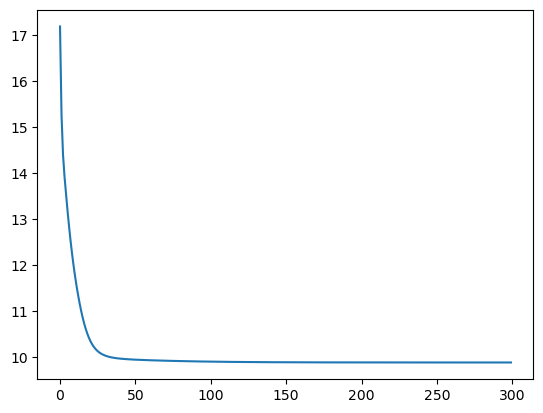

In [114]:
best_w, lossess = train(X_train, y_train, X_test, y_test, W, epochs, lr, batch_size)
print(f"Best W: {best_w}")
plt.plot(lossess)

In [56]:
from sklearn.metrics import f1_score

# True labels
y_true = [0, 1, 2, 2, 0, 1, 1, 2, 0, 1]

# Predicted labels
y_pred = [0, 2, 1, 2, 0, 0, 1, 2, 1, 1]

# Compute F1-score for multi-class classification
f1_macro = f1_score(y_true, y_pred, average='macro')  # Macro-averaged F1-score
f1_micro = f1_score(y_true, y_pred, average='micro')  # Micro-averaged F1-score
f1_weighted = f1_score(y_true, y_pred, average='weighted')  # Weighted F1-score

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.611111111111111
Micro F1-score: 0.6
Weighted F1-score: 0.6
